# Statistics for Data Science and Business Analysis

This notebook is meant to serve as a personal reference for the material covered in the Udemy course [Statistics for Data Science and Business Analysis](https://www.udemy.com/statistics-for-data-science-and-business-analysis).

I will define and illustrate (where applicable) the concepts that are covered.

**Contents:**
- Section 2: Sample vs. Population Data 
    - [Terms](#section2terms)
    - [Notes](#section2notes)
    
     
- Section 3: Fundamentals of Descriptive Statistics
    - [Types of Data](#s3_1)
    - [Levels of Measurement](#s3_2)
    - [Categorical Variables: Visualization Techniques](#s3_3)
    - [The Histogram](#s3_4)
    - [Cross Table and Scatter Plot](#s3_5)

## Section 2: Sample vs. Population Data

<a id='section2terms'></a>
### Terms

* **population**
    - the collections of all items of interest in a study; denoted N
* **sample**
    - a subset of the population; denoted n
* **parameter**
    - a value that refers to a population, the opposite of a statistic
* **statistic**
    - a value that refers to a sample, the opposite of a parameter
* **random sample**
    - a random sample is collected when each member of the sample is chosen from the population strictly by chance

<a id='section2notes'></a>
### Notes

* You will almost always be working with sample data and be making data driven decisions and inferences based on  it
* Samples are key to accurate statistical insights and have two defining characteristics, randomness and representativeness
    * a random sample is chosen when each member of the population is chosen strictly by chance
    * a representative sample is a subset of the population that accurately reflects the members of the entire population
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('mtcars.csv')
diamonds = pd.read_csv('diamonds.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


The **population** of the mtcars dataset is all 32 entries within the dataset whereas a **sample** is a subset.

In [3]:
sample = df.sample(5)

This **sample** of 5 cars pulled from the dataset is pulled using datas built in sample function.

The mean mpg of the mtcars **population** would be a **parameter**

In [4]:
df['mpg'].mean()

20.090624999999996

The mean mpg of the **sample** that we pulled would be known as a **statistic**

In [5]:
sample['mpg'].mean()

19.86

## Section 3: Fundamentals of Descriptive Statistics

<a id='s3_1'></a>
### **Types of Data**

* **representative sample**
    - A representative sample is a subset of the population that accurately reflects the members of the entire population.
* **variable**
   - a variable is a set of characteristics of a person, object, thing, idea, etc. variables can vary from case to case
* **types of data**
   - a way to classify data. there are two types of data - categorical and numerical
* **categorical data**
   - a subset of types of data. describes categories or groups
* **numerical data**
    - A subset of types of data. Represents numbers. Can be further divided into discrete and continuous.
* **discrete data**
    - Data that can be counted in a finite matter. Opposite of continuous.
* **continuous data**
    - Data that is 'infinite' and impossible to count. Opposite of discrete.
        
        

### **Types of Data**


- We can classify data in two main ways, based on its type and its measurement level.
- Numbers can be both interval or ratio, but you have to be careful with the context you are operating in.

<a id='s3_2'></a>
###  **Levels of Measurement**


* **levels of measurement**
    - A way to classify data. There are two levels of measurement - qualitative and quantitative, which are further divided into nominal & ordinal, and ratio & interval, respectively. 
* **qualitative data**
    - A subset of levels of measurement. There are two types of qualitative data : nominal and ordinal.
* **quantitative data**
    - A subset of levels of measurement. There are two types of quantitative data - ratio and interval.
* **nominal**
    - Refers to variables that describe different categories and cannot be put in any order.
* **ordinal**
    - Refers to variables that describe different categories, but can be ordered.
* **ratio**
    - A number, no matter if whole or a fraction. There exists a unique and unambiguous zero point. 
* **interval**
    - An interval variable represents a number or an interval. There isn't a unique and unambiguous zero point. For example, degrees in Celsius and Fahrenheit are interval variables, while Kelvin is a ratio variable.
        
        

<a id='s3_3'></a>
### **Categorical Variables: Visualization Techniques**
* **frequency distribution table**
    - A table that represents the frequency of each variable.
* **frequency**
    - Measures the occurrence of a variable.
* **absolute frequency**
    - Measures the NUMBER of occurrences of a variable.
* **relative frequency**
    - Measures the RELATIVE NUMBER of occurrences of a variable. Usually, expressed in percentages. 
* **cumulative frequency**
    - The sum of relative frequencies so far. The cumulative frequency of all members is 100% or 1. 
* **pareto diagram**
    - A special type of bar chart, where frequencies are shown in descending order. There is an additional line on the chart, showing the cumulative frequency.
        
        

**Notes**


- Visualizing data is the most intuitive way to interpret it. It is much easier to visualize data if you know what type it is.
- Some of the most common ways to visualize categorical data are frequency distribution tables, bar charts, pie charts, and pareto diagrams.

**Frequency Distribution Table**

In [6]:
diamonds['cut'].value_counts(ascending=True)

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

In [7]:
diamonds['cut'].value_counts(ascending=False)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

#### **Bar Chart**

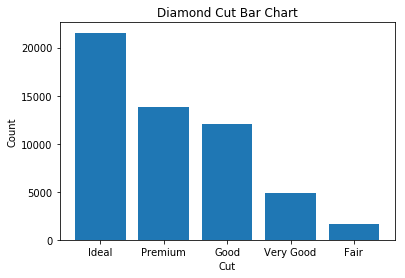

In [8]:
y_pos = np.arange(len(diamonds['cut'].unique()))
plt.bar(y_pos, diamonds['cut'].value_counts(), align = 'center')
plt.xticks(y_pos, diamonds['cut'].unique())
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Diamond Cut Bar Chart')

plt.show()

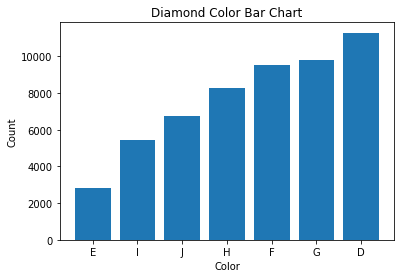

In [9]:
y_pos = np.arange(len(diamonds['color'].unique()))
plt.bar(y_pos, diamonds['color'].value_counts(ascending = True), align = 'center')
plt.xticks(y_pos, diamonds['color'].unique())
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Diamond Color Bar Chart')

plt.show()

#### Pie Chart

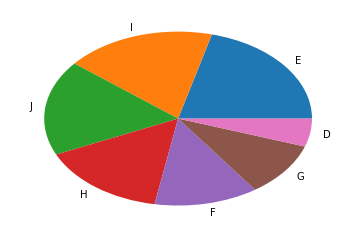

In [10]:
plt.pie(diamonds['color'].value_counts(), labels = diamonds['color'].unique())

plt.show()

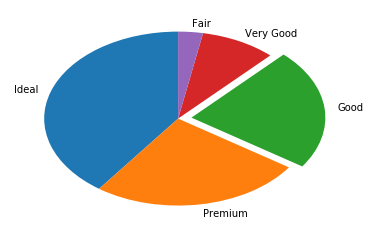

In [11]:
plt.pie(diamonds['cut'].value_counts(), explode = [0,0,.1,0,0], startangle = 90, labels = diamonds['cut'].unique())

plt.show()

#### Pareto Diagram

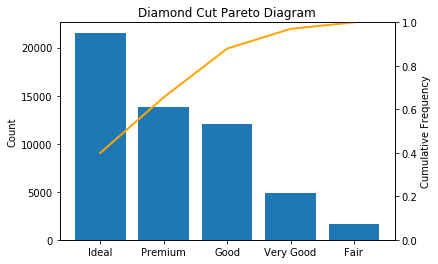

In [12]:
values = diamonds['cut'].value_counts()
labels = np.arange(len(diamonds['cut'].unique()))

yvalues = []
xvalues = range(len(diamonds['cut'].unique()))

tmp = 0
for x in diamonds['cut'].value_counts():
    tmp += x/len(diamonds)
    yvalues.append(tmp)
    
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
    
ax1.bar(labels, values, align = 'center')
ax1.set_ylabel('Count')
ax2.plot(xvalues, yvalues, color = 'orange', linewidth = 2, linestyle = '-')
ax2.set_ylim(0,1)
ax2.set_ylabel('Cumulative Frequency')
plt.xticks(labels, diamonds['cut'].unique())
plt.title('Diamond Cut Pareto Diagram')

plt.show()

The pareto diagram combines the best parts of bar and pie charts. It is named after the Italian economist Vilfredo Pareto. It shows how subtotals change with each additional category.

Vilfredo Pareto is also the namesake of the Pareto Principle, which states that 80% of the effects come from 20% of the causes. In business, this principle applies to say that 80% of sales come from 20% of the customers. In software development, Microsoft has said that solving 20% of software bugs can fix 80% of the problems.

<a id='s3_4'></a>
### **The Histogram**
* **histogram**
   - A type of bar chart that represents numerical data. It is divided into intervals (or bins) that are not overlapping and span from the first observation to the last. The intervals (bins) are adjacent - where one stops, the other starts.
* **bins**
   - The intervals that are represented in a histogram.


When working with numerical variables, it makes much more sense to group the data into intervals and then plot the corresponding frequency. This allows for a meaningful visual representation.

Interval width is described by the following formula

$$\frac{\textsf{max} - \textsf{min}}{\textsf{number of intervals}}$$

A number is included in an interval if:

1.) That number is > than the lower bound

2.) That number is $\leq$ to the upper bound

Relative frequency is given by the following formula

$$\textsf{relative frequency} = \frac{\textsf{frequency}}{\textsf{total frequency}}$$

Sometimes there is justification to create a histogram with unequal intervals, such as when targeting specific age groups with a study. In most cases, it is most appropriate to use equal intervals.

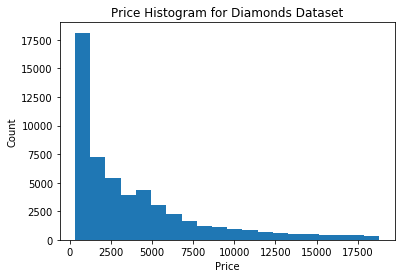

In [13]:
plt.hist(diamonds['price'], bins = 20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Histogram for Diamonds Dataset')

plt.show()

<a id='s3_5'></a>
### **Cross table and Scatter Plot**
* **cross table**
    - A table which represents categorical data. On one axis we have the categories, and on the other - their frequencies. It can be built with absolute or relative frequencies.
* **contingency table**
    - See cross table.
    
Cross tables are an easy way to get a feel for the distribution of two categorical variables.
    

In [14]:
pd.crosstab(diamonds['color'], diamonds['clarity'], margins = True)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,All
color,,,,,,,,,
D,42,73,2083,1370,705,1697,252,553,6775
E,102,158,2426,1713,1281,2470,656,991,9797
F,143,385,2131,1609,1364,2201,734,975,9542
G,150,681,1976,1548,2148,2347,999,1443,11292
H,162,299,2275,1563,1169,1643,585,608,8304
I,92,143,1424,912,962,1169,355,365,5422
J,50,51,750,479,542,731,74,131,2808
All,741,1790,13065,9194,8171,12258,3655,5066,53940


An easy way to visualize two categorical variables at the same time is using what's known as a side-by side bar chart.

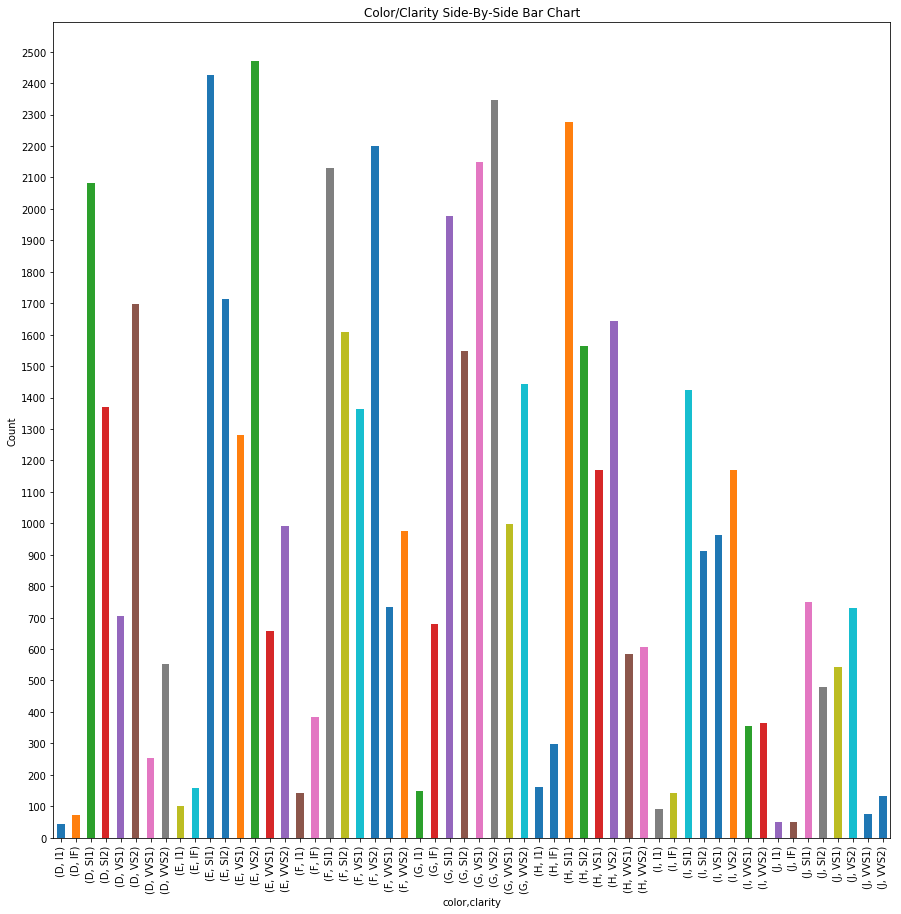

In [50]:
#https://stackoverflow.com/a/47494809
ax = diamonds.groupby(['color','clarity'])['clarity'].count().plot.bar(figsize = (15,15), title = 'Color/Clarity Side-By-Side Bar Chart', yticks = range(0,2600,100));
ax.set_ylabel('Count')
plt.savefig('side_by_side.png')

![Side-by-side Bar Chart](side_by_side.png)

* **scatter plot**
    - A plot that represents numerical data. Graphically, each observation looks like a point on the scatter plot.

In [51]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


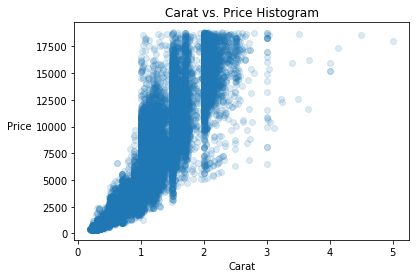

In [79]:
from matplotlib.pyplot import figure

plt.scatter(diamonds['carat'],diamonds['price'], alpha = .15)
plt.title('Carat vs. Price Histogram')
plt.xlabel('Carat')
plt.ylabel('Price',  horizontalalignment = 'right', rotation = 0);

### **Mean, median, and mode**
* **measures of central tendency**
    - Measures that describe the data through the so called 'averages'. The most common are the mean, median and mode. There is also geometric mean, harmonic mean, weighted-average mean, etc.
* **mean**
    - The simple average of the dataset. Denoted μ.
* **median**
    - The middle number in an ordered dataset.
* **mode**
    - The value that occurs most often. A dataset can have 0, 1 or multiple modes.
    
    

### **Skewness**
* **measures of asymmetry**
    - Measures that describe the data through the level of symmetry that is observed. The most common are skewness and kurtosis.
* **skewness**
    - A measure that describes the symmetry of the dataset around its mean.
    
    

### **Variance**
* **sample formula**
    - A formula, that is calculated on a sample. The value obtained is a statistic.
* **population formula**
        - A formula, that is calculated on a population. The value obtained is a parameter.
* **measures of variability**
    - Measures that describe the data through the level of dispersion (variability). The most common ones are variance and standard deviation.
* **variance**
    - Measures the dispersion of the dataset around its mean. It is measured in units squared. Denoted σ2 for a population and s2 for a sample.
    
    

### **Standard Deviation and Coefficient of Variation**
* **standard deviation**
    - Measures the dispersion of the dataset around its mean. It is measured in original units. It is equal to the square root of the variance. Denoted σ for a population and s for a sample.
* **coefficient of variation**
    - Measures the dispersion of the dataset around its mean. It is also called 'relative standard deviation'. It is useful for comparing different datasets in terms of variability.
    
    

### **Covariance**
* **univariate measure**
    - A measure which refers to a single variable.
* **multivariate measure**
    - A measure which refers to multiple variables.
* **covariance**
    - A measure of relationship between two variables. Usually, because of its scale of measurement, covariance is not directly interpretable. Denoted σxy for a population and sxy for a sample.
    
    

### **Correlation**
* **linear correlation coefficient**
    - A measure of relationship between two variables. Very useful for direct interpretation as it takes on values from [-1,1]. Denoted ρxy for a population and rxy for a sample.
* **correlation**
    - A measure of the relationship between two variables. There are several ways to compute it, the most common being the linear correlation coefficient.